# numpy

## Задача №1. Скользящее окно

Реализовать функцию скользящего окна для заданного одномерного ряда данных, формирующую из него матрицу по следующему правилу:

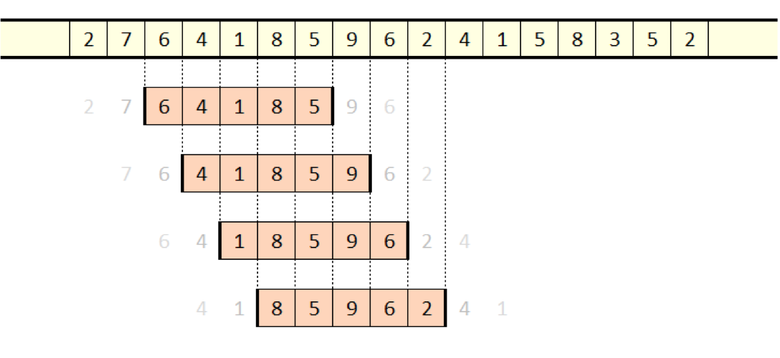

Аргументы функции:

*x_array* - одномерный массив **numpy.ndarray**

*w* - ширина окна для итоговой матрицы

*step* - шаг окна по исходному одномерному ряду данных

Результат:

*A_matrix* - матрица скользящего среднего

In [ ]:
import numpy as np

def sliding_window(x_array, w, step = 1):
    A_matrix = []
    for i in range(0,len(x_array)-w+1, step):
        A_matrix.append(x_array[i:i+w])
    return np.array(A_matrix)

In [ ]:
# проверка 1
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

# проверка 2
window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


# **Анализ данных по доходу населения UCI Adult**


Автор материала: Юрий Кашницкий (@yorko в Slack ODS). Материал распространяется на условиях лицензии Creative Commons CC BY-NC-SA 4.0. Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult)**

Уникальные значения признаков (больше информации по ссылке выше):

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,
                   names = ["age", "workclass", "fnlwgt", "education",
                    "education-num", "marital-status", "occupation", "relationship",
                    "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"], engine='python')

list_of_objects = data.dtypes.axes[0][data.dtypes == "object"]
data[list_of_objects] = data[list_of_objects].astype("string")

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **0. Изучить в документации методы groupby и agg**

## **1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

### Визуализировать результат

sex
Male      21790
Female    10771
dtype: int64


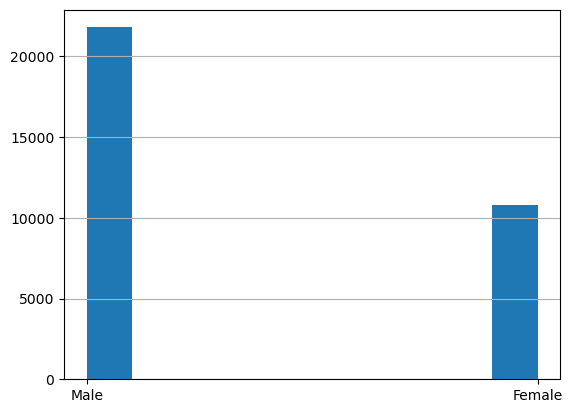

In [ ]:
import matplotlib.pyplot as plt
print(data.value_counts('sex'))
plt.hist(data['sex'])
plt.grid(axis='y')
plt.show()

## **2. Каков средний возраст (признак age) женщин?**

In [ ]:
data[data['sex'] == 'Female'].groupby('sex')['age'].mean()

sex
Female    36.85823
Name: age, dtype: float64

## **3. Какова доля граждан Германии (признак native-country)?**

In [ ]:
print(data.value_counts('native-country')['Germany']/len(data.index))

0.004207487485028101


## **4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?**

### Визуализировать результат

Cредние значения возраста тех, кто получает более 50K в год:  44.24984058155847
Cредние значения возраста тех, кто получает менее 50K в год:  36.78373786407767 

Cреднеквадратичные отклонения возраста тех, кто получает более 50K в год:  10.519027719851843
Cреднеквадратичные отклонения возраста тех, кто получает менее 50K в год:  14.020088490824866


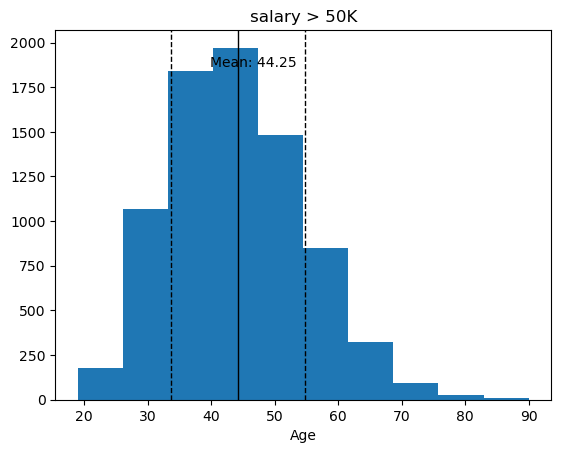

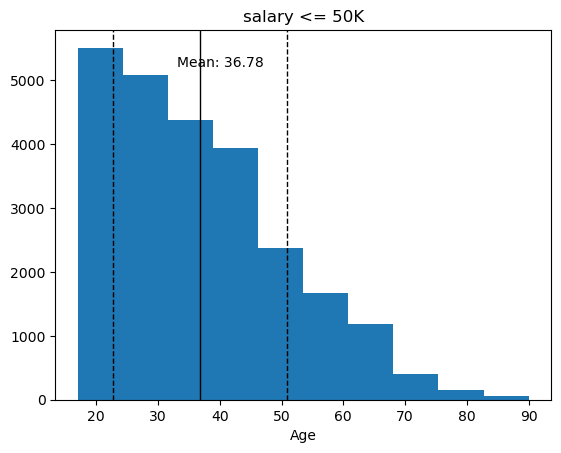

In [ ]:

print('Cредние значения возраста тех, кто получает более 50K в год: ',data[data['salary'] == '>50K'].groupby('salary')['age'].mean()[">50K"])
print('Cредние значения возраста тех, кто получает менее 50K в год: ',data[data['salary'] == '<=50K'].groupby('salary')['age'].mean()['<=50K'], '\n')
print('Cреднеквадратичные отклонения возраста тех, кто получает более 50K в год: ',data[data['salary'] == '>50K'].groupby('salary')['age'].std()[">50K"])
print('Cреднеквадратичные отклонения возраста тех, кто получает менее 50K в год: ',data[data['salary'] == '<=50K'].groupby('salary')['age'].std()['<=50K'])

plt.hist(data[data['salary'] == '>50K'].groupby('salary')['age'].get_group('>50K'))
plt.axvline(data[data['salary'] == '>50K'].groupby('salary')['age'].mean()[">50K"], color='k',  linewidth=1)
plt.axvline(data[data['salary'] == '>50K'].groupby('salary')['age'].mean()[">50K"]+data[data['salary'] == '>50K'].groupby('salary')['age'].std()['>50K'], color='k', linestyle='dashed', linewidth=1)
plt.axvline(data[data['salary'] == '>50K'].groupby('salary')['age'].mean()[">50K"]-data[data['salary'] == '>50K'].groupby('salary')['age'].std()['>50K'], color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(data[data['salary'] == '>50K'].groupby('salary')['age'].mean()[">50K"]*0.9, max_ylim*0.9, 'Mean: {:.2f}'.format(data[data['salary'] == '>50K'].groupby('salary')['age'].mean()[">50K"]))
plt.title("salary > 50K")
plt.xlabel("Age")
plt.show()


plt.hist(data[data['salary'] == '<=50K'].groupby('salary')['age'].get_group('<=50K'))
plt.axvline(data[data['salary'] == '<=50K'].groupby('salary')['age'].mean()["<=50K"], color='k',  linewidth=1)
plt.axvline(data[data['salary'] == '<=50K'].groupby('salary')['age'].mean()["<=50K"]+data[data['salary'] == '<=50K'].groupby('salary')['age'].std()['<=50K'], color='k', linestyle='dashed', linewidth=1)
plt.axvline(data[data['salary'] == '<=50K'].groupby('salary')['age'].mean()["<=50K"]-data[data['salary'] == '<=50K'].groupby('salary')['age'].std()['<=50K'], color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(data[data['salary'] == '<=50K'].groupby('salary')['age'].mean()["<=50K"]*0.9, max_ylim*0.9, 'Mean: {:.2f}'.format(data[data['salary'] == '<=50K'].groupby('salary')['age'].mean()["<=50K"]))

plt.title("salary <= 50K")
plt.xlabel("Age")
plt.show()

## **6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [ ]:
ed = {'Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters' , 'Doctorate'}
real_ed = set(data[data['salary'] == '>50K'].groupby('salary')['education'].get_group('>50K'))
if(ed == real_ed):
    print('Правда')
else:
    print('Неправда')

Неправда


## **7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [ ]:

display(data.groupby(['sex', 'race'])['age'].describe())
print('Максимальный возраст мужчин расы Amer-Indian-Eskimo: ', data.loc[data['sex']=='Male'].groupby('race')['age'].max()['Amer-Indian-Eskimo'])

count       mean        std   min   25%   50%  \
sex    race                                                                  
Female Amer-Indian-Eskimo    119.0  37.117647  13.114991  17.0  27.0  36.0   
       Asian-Pac-Islander    346.0  35.089595  12.300845  17.0  25.0  33.0   
       Black                1555.0  37.854019  12.637197  17.0  28.0  37.0   
       Other                 109.0  31.678899  11.631599  17.0  23.0  29.0   
       White                8642.0  36.811618  14.329093  17.0  25.0  35.0   
Male   Amer-Indian-Eskimo    192.0  37.208333  12.049563  17.0  28.0  35.0   
       Asian-Pac-Islander    693.0  39.073593  12.883944  18.0  29.0  37.0   
       Black                1569.0  37.682600  12.882612  17.0  27.0  36.0   
       Other                 162.0  34.654321  11.355531  17.0  26.0  32.0   
       White               19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
sex    race                             
Female Amer-Indian-Eskimo  46.00  80.0  
       Asian-Pac-Islander  43.75  75.0  
       Black               46.00  90.0  
       Other               39.00  74.0  
       White               46.00  90.0  
Male   Amer-Indian-Eskimo  45.00  82.0  
       Asian-Pac-Islander  46.00  90.0  
       Black               46.00  90.0  
       Other               42.00  77.0  
       White               49.00  90.0

Максимальный возраст мужчин расы Amer-Indian-Eskimo:  82


## **8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

### Визуализировать результат

Доля зарбатывающих много среди женатых мужчин:  0.4405139945351156
Доля зарбатывающих много среди холостых мужчин:  0.08449509031397745


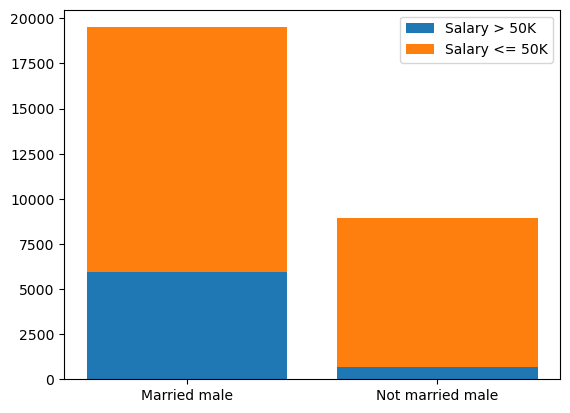

In [ ]:
rich_married_male = len(data.loc[data['sex']=="Male"].loc[data['marital-status'].str.contains("Married")].loc[data['salary']=='>50K'])
married_male = len(data.loc[data['sex']=="Male"].loc[data['marital-status'].str.contains("Married")])
rich_not_married_male = len(data.loc[data['sex']=="Male"].loc[data['marital-status'].str.contains("Married") == False].loc[data['salary']=='>50K'])
not_married_male = len(data.loc[data['sex']=="Male"].loc[data['marital-status'].str.contains("Married") == False])
print('Доля зарбатывающих много среди женатых мужчин: ',rich_married_male/married_male)
print('Доля зарбатывающих много среди холостых мужчин: ',rich_not_married_male/not_married_male)


data['Married'] = [1 if data['marital-status'][i][:7]=='Married' else 0 for i in range(len(data)) ]
xdata = ['Married male', 'Not married male']

ydata = [married_male, not_married_male]

ydata_1 = [rich_married_male, rich_not_married_male]
plt.bar(xdata, ydata_1, label='Salary > 50K')
plt.bar(xdata, ydata, bottom=ydata_1, label='Salary <= 50K')
plt.legend()
plt.show()


## **9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [ ]:
max_hours = data['hours-per-week'].max()
print('Максимальное число часов человек работает в неделю: ', max_hours)
print('Количество людей, работающих максимальное количество часов: ', data[data['hours-per-week'] == max_hours].groupby('hours-per-week')['salary'].get_group(99).count() )
print('Процент людей, зарабатывающих много, среди людей, работающих максимальное количество часов: ', len(data.loc[data['salary']=='>50K' ].loc[data['hours-per-week']==99])/data[data['hours-per-week'] == max_hours].groupby('hours-per-week')['salary'].get_group(99).count()*100, '%' )




Максимальное число часов человек работает в неделю:  99
Количество людей, работающих максимальное количество часов:  85
Процент людей, зарабатывающих много, среди людей, работающих максимальное количество часов:  29.411764705882355 %


## **10. Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).**

### Визуализировать результат

Cреднее время работы зарабатывающих мало:  native-country
?                             40.164760
Cambodia                      41.416667
Canada                        37.914634
China                         37.381818
Columbia                      38.684211
Cuba                          37.985714
Dominican-Republic            42.338235
Ecuador                       38.041667
El-Salvador                   36.030928
England                       40.483333
France                        41.058824
Germany                       39.139785
Greece                        41.809524
Guatemala                     39.360656
Haiti                         36.325000
Holand-Netherlands            40.000000
Honduras                      34.333333
Hong                          39.142857
Hungary                       31.300000
India                         38.233333
Iran                          41.440000
Ireland                       40.947368
Italy                         39.625000
Jamaica               

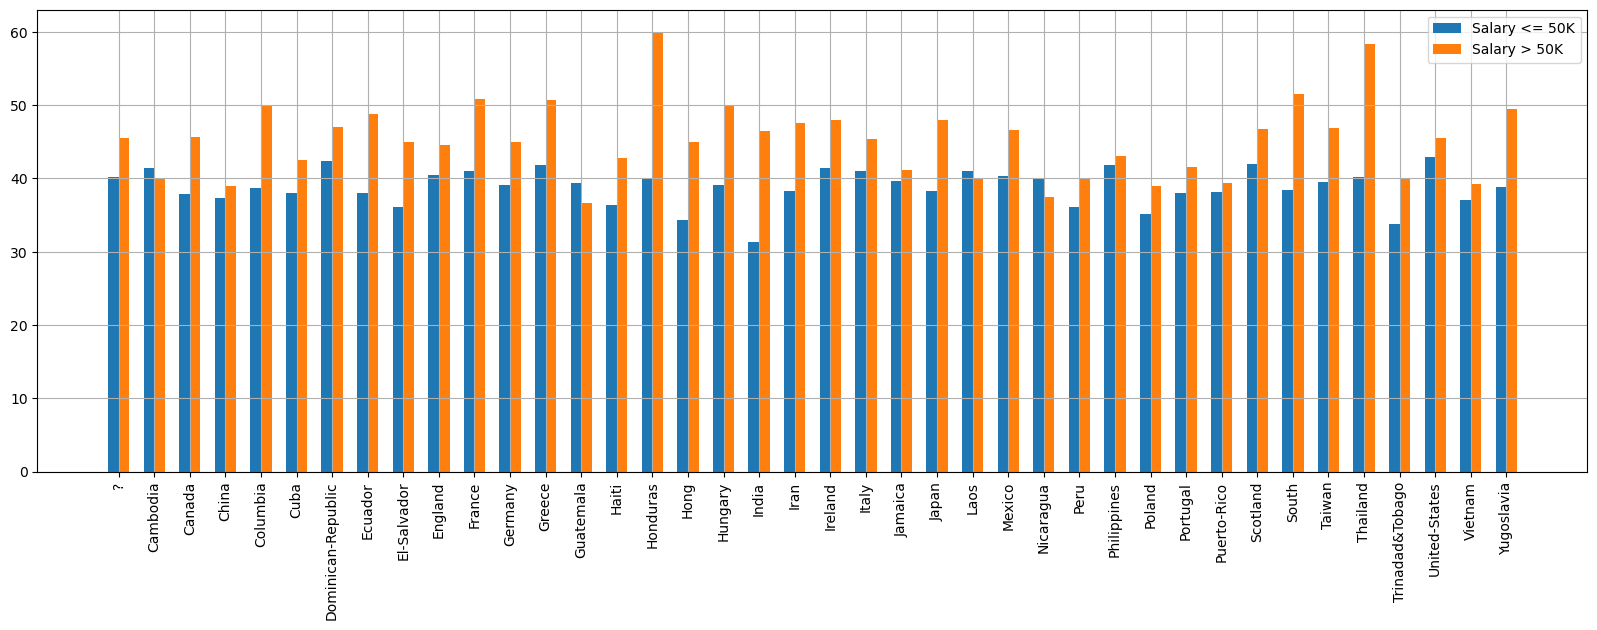

In [ ]:
print('Cреднее время работы зарабатывающих мало: ', data[data['salary'] == '<=50K'].groupby('native-country')['hours-per-week'].mean())
print('Cреднее время работы зарабатывающих много: ', data[data['salary'] == '>50K'].groupby('native-country')['hours-per-week'].mean())
x_poor = data[data['salary'] == '<=50K'].groupby('native-country')['hours-per-week'].mean()
x_rich = data[data['salary'] == '>50K'].groupby('native-country')['hours-per-week'].mean()
x = list(x_rich.keys())
l = len(x_rich)

ind = np.arange(l)
width = 0.3

y_rich = x_rich.to_numpy()[0:l]
y_poor = x_poor.to_numpy()[0:l]

plt.figure(figsize=(20,6))
plt.bar(ind, y_poor, width, label='Salary <= 50K')

plt.bar(ind+width, y_rich, width, label='Salary > 50K')

plt.xticks(ind + width / 2, x)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()